<a href="https://colab.research.google.com/github/hectorcamachoz/Regresion_lineal_simple/blob/main/A1_2_594557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1.2 Regresion Lineal Simple

**1.** En el siguiente bloque de codigo se importara la base de datos
felicidad&GDP.csv con la funcion read_csv() de la libreria pandas. Tambien se imprimiran los paises mas felices y los que tienen mayor GDP

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
df = pd.read_csv('felicidad&GDP.csv')

tabla_felicidad = df.sort_values('Felicidad',ascending=False)
print('Top 10 paises mas felices de acuerdo a nuestra base de datos: ')
print(tabla_felicidad.head(10), '\n')
tabla_GDP = df.sort_values(by = 'GDP',ascending=False)
print('Top 10 paises con mayor GDP de acuerdo a nuestra base de datos: ')
print(tabla_GDP.head(10))


Top 10 paises mas felices de acuerdo a nuestra base de datos: 
          Pais  Felicidad                GDP
0      Finland       7.82 271,837,000,000.00
1      Denmark       7.64 356,085,000,000.00
2      Iceland       7.56  21,718,075,725.00
3  Switzerland       7.51 752,248,000,000.00
4  Netherlands       7.41 913,865,000,000.00
5   Luxembourg       7.40  73,353,132,794.00
6       Sweden       7.38 541,487,000,000.00
7       Norway       7.37 362,198,000,000.00
8       Israel       7.36 407,101,000,000.00
9  New Zealand       7.20 211,735,000,000.00 

Top 10 paises con mayor GDP de acuerdo a nuestra base de datos: 
               Pais  Felicidad                   GDP
15    United States       6.98 20,893,700,000,000.00
70            China       5.59 14,687,700,000,000.00
52            Japan       6.04  5,040,110,000,000.00
13          Germany       7.03  3,846,410,000,000.00
16   United Kingdom       6.94  2,756,900,000,000.00
130           India       3.78  2,667,690,000,000.00
19  

**2.** En el siguiente bloque de codigo, se graficara el nivel de felicidad de acuerdo al nivel, en logaritmo base 10, del GDP, utilizando el comando log10() de la libreria numpy.

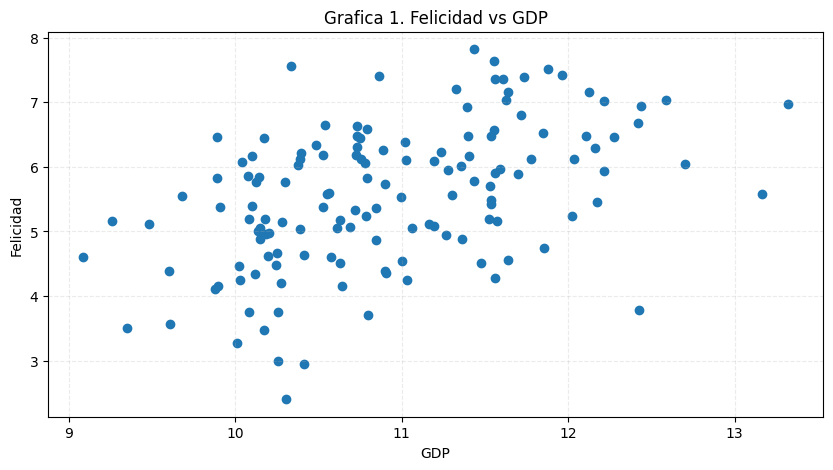

In [79]:
x = np.log10(df['GDP'])
y = df['Felicidad']

plt.figure(figsize=(10,5))
plt.title('Grafica 1. Felicidad vs GDP',fontsize = 12)
plt.grid(True, alpha = 0.25,linestyle = '--')
plt.scatter(x,y)
plt.xlabel('GDP')
plt.ylabel('Felicidad')
plt.show()

**3.** A continuacion, se calcularan los dos coeficientes de nuestro modelo de regresion lineal simple, utilizando las formulas vistas en clase, y las funciones de numpy, sum y mean.

In [43]:
mean_x = np.mean(x)
mean_y = np.mean(y)
beta_1 = np.sum((x - mean_x)*(y - mean_y))/np.sum((x - mean_x)**2)
beta_0 = mean_y - beta_1*mean_x

print('Coeficiente beta 1: ',beta_1)
print('Coeficiente beta 0: ',beta_0)

Coeficiente beta 1:  0.628128465881041
Coeficiente beta 0:  -1.3023500570747295


**4.** En el siguiente bloque, se graficaran de nuevo, junto con el nuevo modelo de regresion lineal simple.

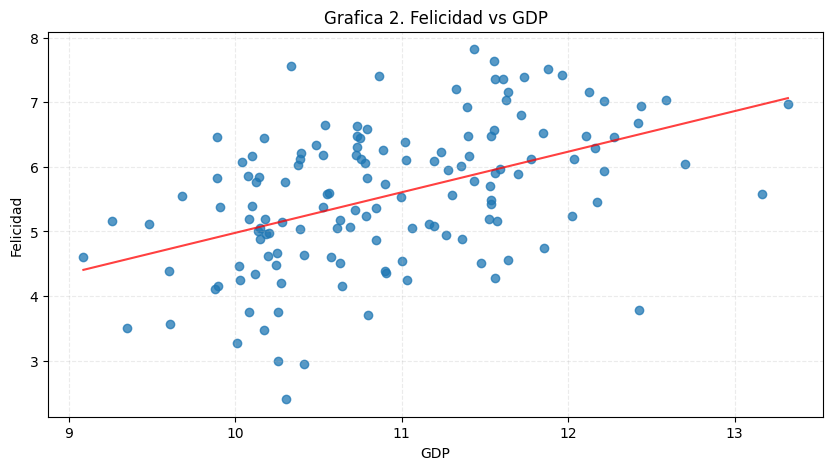

In [80]:
modelo = beta_0 + beta_1*x

plt.figure(figsize=(10,5))
plt.title('Grafica 2. Felicidad vs GDP',fontsize = 12)
plt.grid(True, alpha = 0.25,linestyle = '--')
plt.scatter(x,y, alpha = 0.75)
plt.xlabel('GDP')
plt.ylabel('Felicidad')

x_linea = [min(x),max(x)]
y_linea = [beta_0 + beta_1*x_linea[0],beta_0 + beta_1*x_linea[1]]
plt.plot(x_linea,y_linea,'r', alpha = 0.75)

plt.show()


Observando la grafica anterior, podemos darnos cuenta que la linea de tendencia esta pasando por el centro del area observada en los puntos de nuestra base de datos.

**5.** A continuacion se calculara el RSS (Residual Sum of Squares) de nuestro modelo, para poderlo utilizar despues en los caluclos de nuestro error estandar de los coeficientes y en el RSE (Residual Standard Error), que sera el error promedio tipico de nuestro modelo

In [68]:
e = np.zeros(len(y))
for i in range(len(y)):
  e[i] = y[i] - modelo[i]

RSS = np.sum(e**2)
print('RSS: ',RSS)


RSS:  131.3738317732635


**6.** En el siguiente bloque, calcularemos el error estandar de los coeficientes y el intervalo de confianza del 95% de beta 1.

In [106]:
SE_beta1 = np.sqrt(RSS/(len(y) - 2))*1/np.sqrt(np.sum((x - mean_x)**2))
print('Error estandar de beta 1: ',SE_beta1)

t = beta_1/SE_beta1
print('Estadistico t: ',t)
gdl = len(y) - 2
print('Grados de libertad: ',gdl)
p_value = 2*(1 - stats.t.cdf(t,gdl))
print('Valor p: ',p_value)

print('Intervalos de confianza: ', [beta_1 - p_value*SE_beta1,
                                    beta_1 + p_value*SE_beta1])

print('\nDebido a que el valor p es menor que nuestro nivel de significancia ')
print('de 5%, podemos decir que sí existe una relacion significativa entre el ')
print('nivel de felicidad y el valor de GDP en logaritmo base 10 ')

Error estandar de beta 1:  0.09983378435340727
Estadistico t:  6.291742519320849
Grados de libertad:  139
Valor p:  3.825717964645037e-09
Intervalos de confianza:  [0.6281284654991051, 0.6281284662629769]

Debido a que el valor p es menor que nuestro nivel de significancia 
de 5%, podemos decir que sí existe una relacion significativa entre el 
nivel de felicidad y el valor de GDP en logaritmo base 10 


**7.** A continuacion, se calculara el RSE y la R^2, para saber el error promedio de nuestro modelo y que tan adecuado es para el sistema para los datos utilizados.

In [113]:
# Otra forma de calcular ESS y TSS
#z = np.zeros(len(y))
#g = np.zeros(len(y))
#for i in range(len(y)):
#  z[i] = (y[i] - mean_y)**2
#for i in range(len(y)):
 # g[i] = (modelo[i] - mean_y)**2
#ESS = np.sum(g)


RSE = np.sqrt(RSS/(gdl))

ESS = np.sum((modelo - mean_y)**2)
TSS = np.sum((y - mean_y)**2)

R2 = ESS/TSS

print('RSE: ',RSE)
print('TSS: ',TSS)
print('ESS: ',ESS)
print('R^2: ',R2)

print('\nObservando R^2, podemos concluir que este modelo de regresion lineal')
print('simple, no es el adecuado, ya que el valor de R^2 es muy bajo. ')
print('Lo cual me hace sentido, al observar la grafica 2, se puede ver que')
print('los datos estan muy dispersos en comparacion con la linea de tendencia. ')

RSE:  0.9721807858537376
TSS:  168.78798751626567
ESS:  37.41415574300217
R^2:  0.22166361654970654

Observando R^2, podemos concluir que este modelo de regresion lineal
simple, no es el adecuado, ya que el valor de R^2 es muy bajo. 
Lo cual me hace sentido, al observar la grafica 2, se puede ver que
los datos estan muy dispersos en comparacion con la linea de tendencia. 


**8.** Para concluir, se utilizara la funcion OLS() de la libreria statsmodels.api, para verificar que los resultados anteriores son correctos.

In [107]:
modelo_2 = sm.OLS(y,x).fit()
print(modelo_2.summary())
pvalues = modelo_2.pvalues

print('\nValor de p: ', f"{pvalues[0]:.15f}")
print('RSE:', modelo_2.scale**.5,'\n')

                                 OLS Regression Results                                
Dep. Variable:              Felicidad   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              4636.
Date:                Sun, 26 Jan 2025   Prob (F-statistic):                   3.37e-109
Time:                        03:41:19   Log-Likelihood:                         -195.80
No. Observations:                 141   AIC:                                      393.6
Df Residuals:                     140   BIC:                                      396.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<ipython-input-107-339295b40fa3>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('\nValor de p: ', f"{pvalues[0]:.15f}")


Al obtener los datos de ajuste de este modelo, por medio de la funcion OLS(), se puede observar que el valor de RSE de la funcion es de 0.9736302908855606 , es muy parecido al calculado por el codigo es de 0.9721807858537376. Tambien, observamos que el valor de p, es muy pequeño por lo tanto esto nos dice que si hay una relacion entre la variable dependiente he independiente. Y por ultimo, se puede observar el resultado de la R^2 de la funcion de la libreria statsmodels.api es 0.97, y la calculada en el punto 7, es de 0.22, existe una gran diferencia entre ellas.